In [1]:
import pickle
import warnings
import platform
from matplotlib import font_manager, rc
import missingno as msno


plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')
    
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
with open('datas/premierleague_players.pkl', 'rb') as f:
    premier_df = pickle.load(f)

In [3]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name_x          438 non-null    object        
 1   market_value    438 non-null    int64         
 2   app             438 non-null    int64         
 3   conceded_goals  438 non-null    int64         
 4   clean_sheets    438 non-null    int64         
 5   yellow_card     438 non-null    int64         
 6   second_yell     438 non-null    int64         
 7   red_card        438 non-null    int64         
 8   age             438 non-null    int64         
 9   height          438 non-null    int64         
 10  citizenship     438 non-null    int64         
 11  position        438 non-null    object        
 12  foot            438 non-null    object        
 13  agent           438 non-null    object        
 14  club            438 non-null    object        
 15  joined

In [53]:
premier_df.nunique().sort_values()

second_yell         2
red_card            2
agent               2
foot                3
OwnG                3
position            4
ThrB                4
sns                 4
outfitter           7
clean_sheets        8
yellow_card         9
MotM                9
Off                12
Offsides           13
Assists            13
Blocks             16
Goals              18
Crosses            20
club               21
age                22
conceded_goals     22
Drbed              24
Fouls              24
Inter              26
Disp               26
KeyP               27
Fouled             28
Drb                29
SpG                31
UnsTch             33
app                34
Tackles            37
height             37
AerialsWon         45
Clear              53
market_value       56
LongB              69
period             75
Rating_y          130
PS                229
AvgP              306
dtype: int64

## 데이터 전처리

- **citizenship, name 컬럼제거 및 second_yell, red_card 컬럼 범주형으로 변경**

In [5]:
print(premier_df['red_card'].value_counts())
print(premier_df['second_yell'].value_counts())
print(premier_df['citizenship'].value_counts())

0    413
1     25
Name: red_card, dtype: int64
0    426
1     12
Name: second_yell, dtype: int64
1    438
Name: citizenship, dtype: int64


In [6]:
premier_df['red_card'] = premier_df['red_card'].astype(str)
premier_df['second_yell'] = premier_df['second_yell'].astype(str)

premier_df['agent'] = premier_df['agent'].apply(lambda x: x.strip())

premier_df.rename(columns={'PS%': "PS"}, inplace=True) # from_formula 방식의 regression 사용을 위해
premier_df.drop(columns=['name_x', 'citizenship'], inplace=True)

- **계약기간 column 생성 및 joined, expire, last_contract 제거**
- period = (expire - last_contract) / 365

In [7]:
premier_df['period'] = premier_df['expire'] - premier_df['last_contract']
premier_df['period'] = np.round(premier_df['period'].apply(lambda x: x.days) / 365, 1)

premier_df.drop(columns=["joined", "expire", "last_contract"], inplace=True)

### conceded_goals, clean_sheets, yellow_card
- app으로 나눠 경기당 비율로 계산

In [8]:
premier_df.tail(2)

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
436,2700000,13,2,2,2,0,0,29,191,attack,right,GOAL CLUB,West Bromwich Albion,adidas,1,0.3,0.1,1.0,0.0,1.0,0.2,0.1,0.0,2.0,0.6,15.8,63.6,0.2,0.6,0.0,6.76,2.0,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1.0,1.8
437,1620000,15,0,0,1,0,0,31,183,attack,left,no agent,West Bromwich Albion,adidas,2,0.1,0.1,0.7,0.0,0.3,0.1,0.0,0.0,0.0,0.1,2.7,70.0,0.0,0.1,0.0,5.98,0.0,0.3,0.3,0.5,0.1,0.9,1.3,0.1,0.0,4.0


In [9]:
premier_df["conceded_goals"] = (premier_df["conceded_goals"] / premier_df["app"]).round(1)
premier_df["clean_sheets"] = (premier_df["clean_sheets"] / premier_df["app"]).round(1)
premier_df["yellow_card"] = (premier_df["yellow_card"] / premier_df["app"]).round(1)

In [10]:
premier_df.tail(2)

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
436,2700000,13,0.2,0.2,0.2,0,0,29,191,attack,right,GOAL CLUB,West Bromwich Albion,adidas,1,0.3,0.1,1.0,0.0,1.0,0.2,0.1,0.0,2.0,0.6,15.8,63.6,0.2,0.6,0.0,6.76,2.0,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1.0,1.8
437,1620000,15,0.0,0.0,0.1,0,0,31,183,attack,left,no agent,West Bromwich Albion,adidas,2,0.1,0.1,0.7,0.0,0.3,0.1,0.0,0.0,0.0,0.1,2.7,70.0,0.0,0.1,0.0,5.98,0.0,0.3,0.3,0.5,0.1,0.9,1.3,0.1,0.0,4.0


### agent column
- 방법 1. agent가 있으면 1, 없으면 0

In [11]:
premier_df['agent'] = premier_df['agent'].apply(lambda x: "0" if x == "no agent" else "1")

## visualization

### market_value

4500000.0 22500000.0


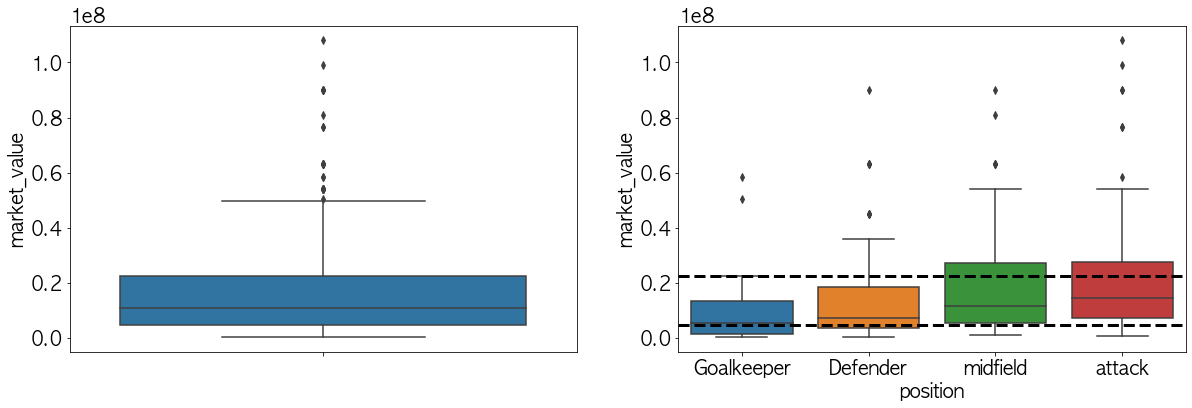

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(data=premier_df, y='market_value', ax=ax[0])
sns.boxplot(data=premier_df, x='position', y='market_value', ax=ax[1])
plt.axhline(np.percentile(premier_df['market_value'], 25), color='black', linestyle='--', linewidth=3)
plt.axhline(np.percentile(premier_df['market_value'], 75), color='black', linestyle='--', linewidth=3)
print(np.percentile(premier_df['market_value'], 25),
     np.percentile(premier_df['market_value'], 75))

plt.show()

-> midfield, attack의 market_value가 goalkeeper, defender보다 높게 책정되어 있는 것을 확인할 수 있다.

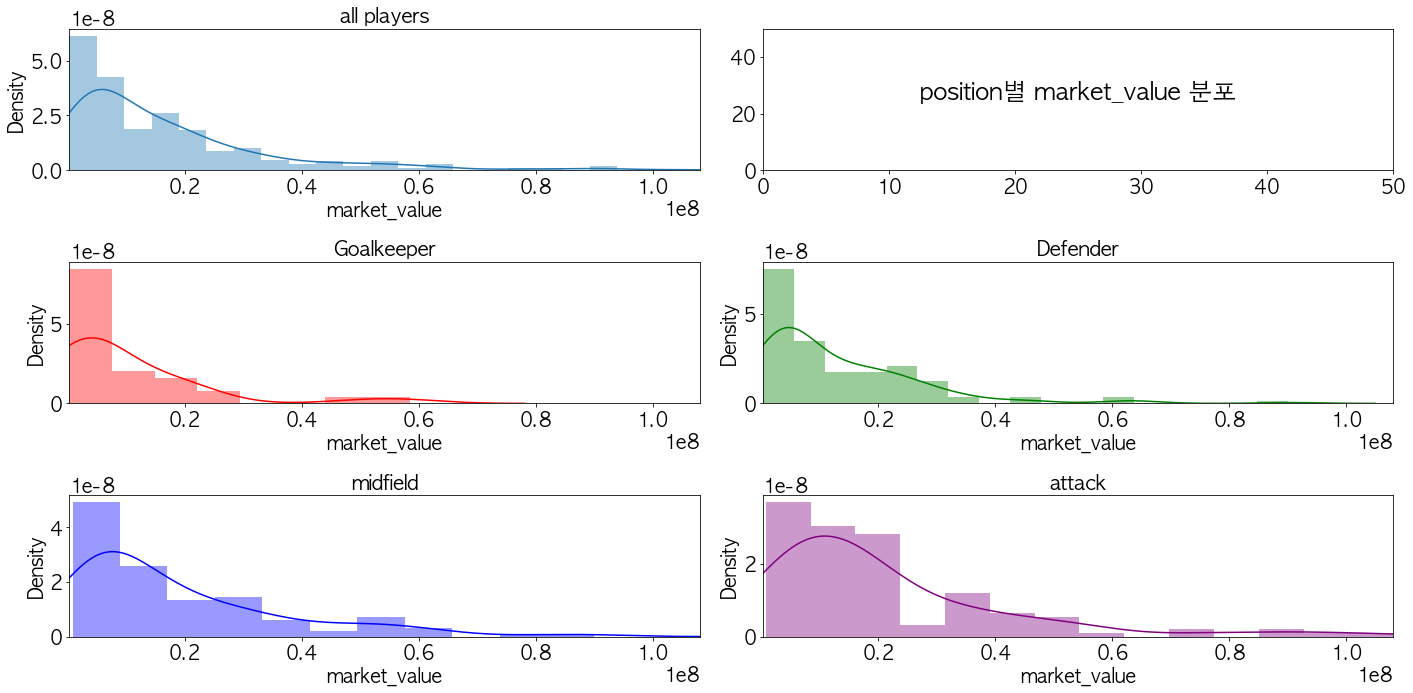

In [57]:
make_by_position('market_value', kde=True)

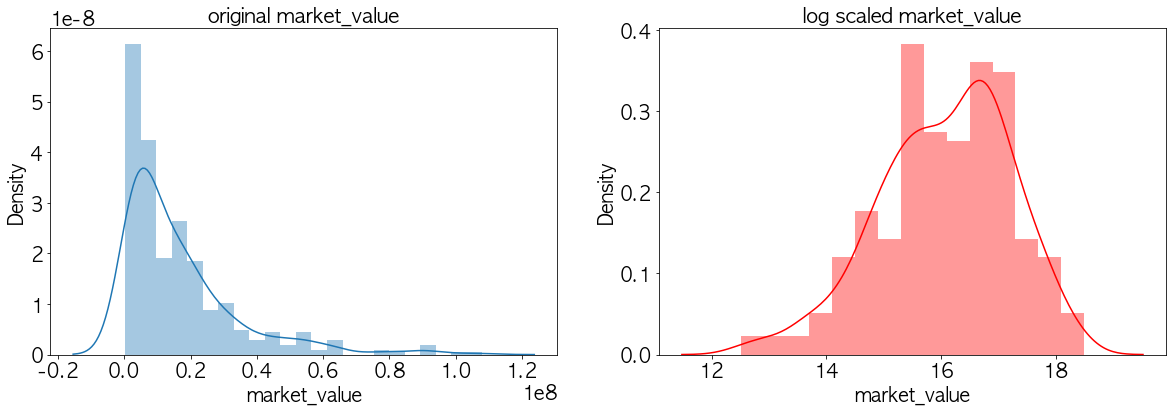

In [56]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.distplot(premier_df['market_value'])
plt.title("original market_value", fontsize=20)

plt.subplot(122)
sns.distplot(np.log1p(premier_df['market_value']), color='r')
plt.title("log scaled market_value", fontsize=20)

plt.show()

In [47]:
cols = premier_df['position'].unique()

def make_by_position(target_col, kde=True):
    
    plt.figure(figsize=(20, 10))
    
    plt.subplot(321)
    sns.distplot(premier_df[target_col], kde=kde)
    plt.title('all players', fontsize=20)
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(322)
    plt.axis([0, 50, 0, 50])
    plt.text(25, 25, f"position별 {target_col} 분포", fontsize=24, bbox=dict(boxstyle='square', color="white"), ha='center')
    
    plt.subplot(323)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[0]], kde=kde, color='r')
    plt.title(cols[0], fontsize=20)
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(324)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[1]], kde=kde, color='g')
    plt.title(cols[1], fontsize=20)
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(325)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[2]], kde=kde, color='b')
    plt.title(cols[2], fontsize=20)
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(326)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[3]], kde=kde, color='purple')
    plt.title(cols[3], fontsize=20)
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))

    plt.tight_layout()
    plt.show()

#### app

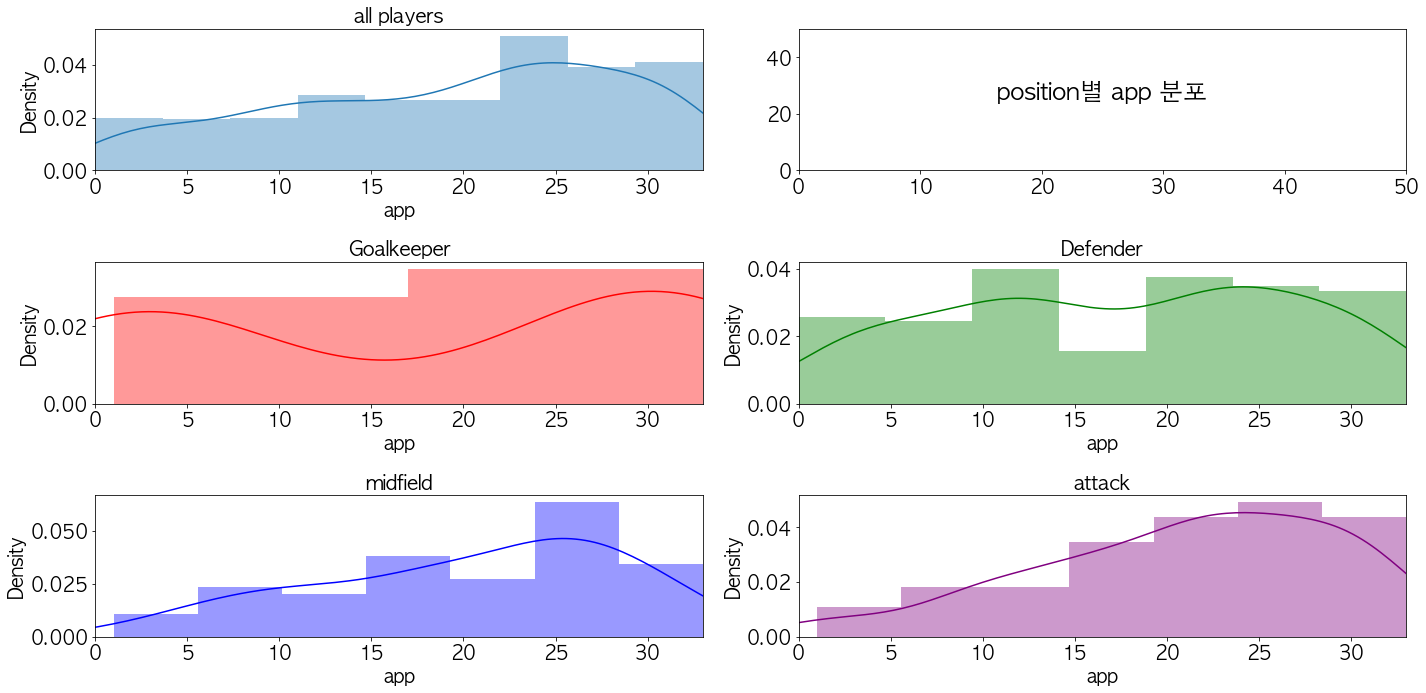

In [48]:
make_by_position('app', kde=True)

#### conceded_goals

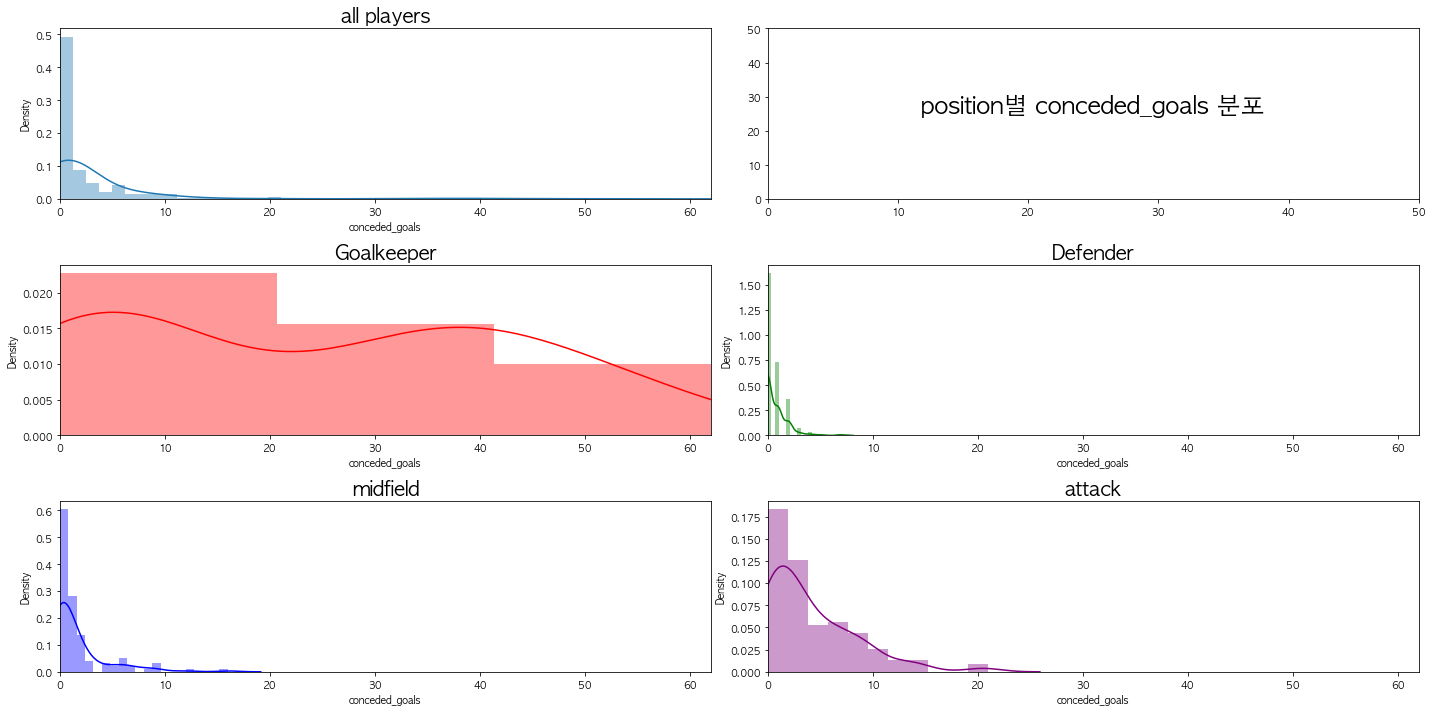

In [91]:
make_by_position('conceded_goals')

#### age

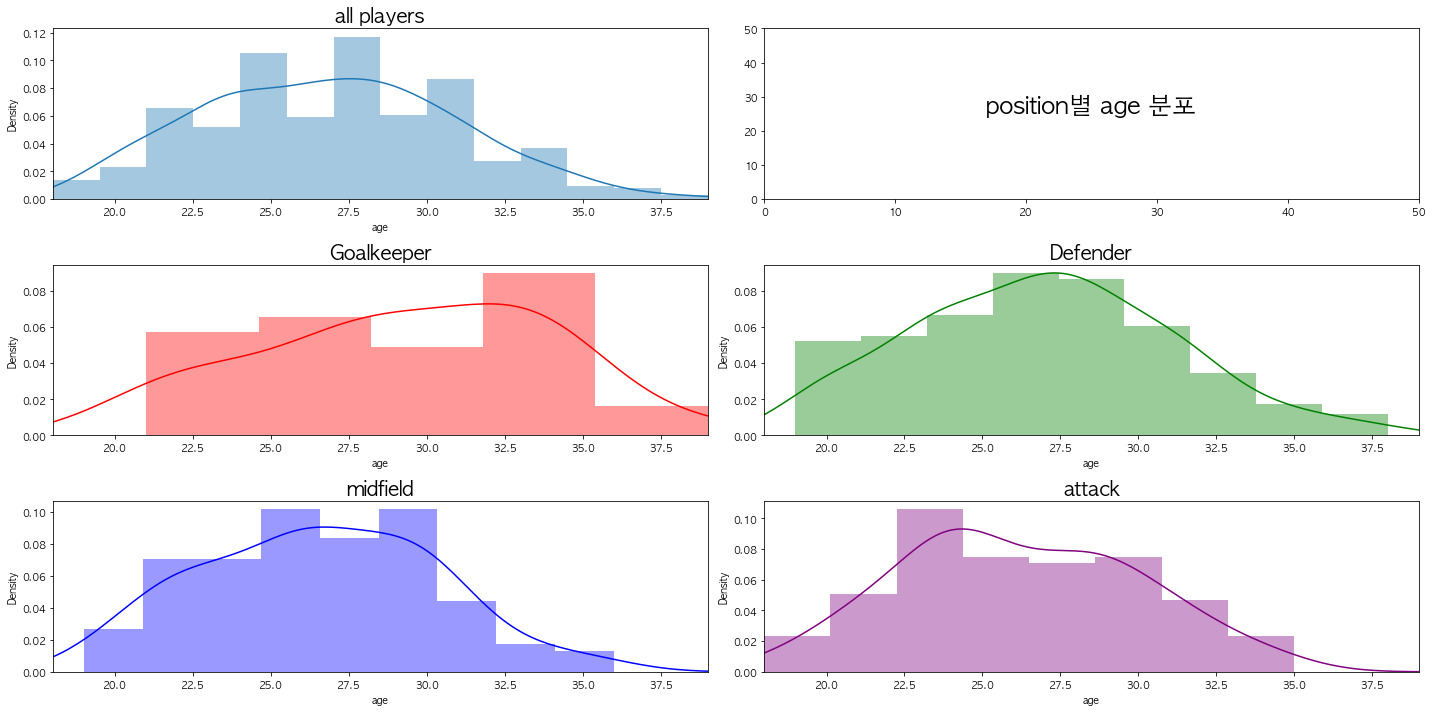

In [92]:
make_by_position('age')

#### 범주형 변수

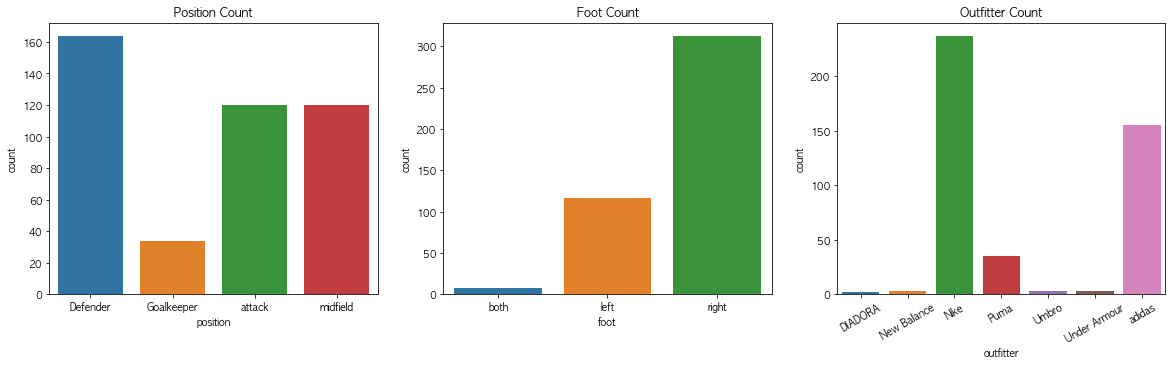

In [11]:
posi_df = premier_df.groupby('position').size().reset_index(name='count')
foot_df = premier_df.groupby('foot').size().reset_index(name='count')
outfit_df = premier_df.groupby('outfitter').size().reset_index(name='count')

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=posi_df, x='position', y='count', ax=ax[0])
sns.barplot(data=foot_df, x='foot', y='count', ax=ax[1])
sns.barplot(data=outfit_df, x='outfitter', y='count', ax=ax[2])

ax[0].set(title='Position Count')
ax[1].set(title='Foot Count')
ax[2].set(title='Outfitter Count')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)

plt.show()

Text(0.5, 1.0, 'sns')

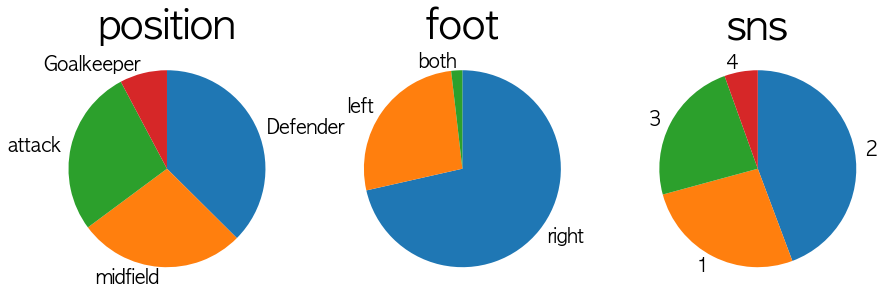

In [55]:
mpl.rcParams['font.size'] = 19.0
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(premier_df['position'].value_counts(),
        startangle=90,
        counterclock=False,
        labels=premier_df['position'].value_counts().keys())
ax1.set_title('position',fontsize=40)

ax2.pie(premier_df['foot'].value_counts(),
        startangle=90,
        counterclock=False,
        labels=premier_df['foot'].value_counts().keys())
ax2.set_title('foot',fontsize=40)

ax3.pie(premier_df['sns'].value_counts(),
            startangle=90,
        counterclock=False,
        labels=premier_df['sns'].value_counts().keys())
ax3.set_title('sns',fontsize=40)

### Outfitter

- major : Nike, Puma, adidas
- others : Under Armour, New Balance, DIADORA, Umbro

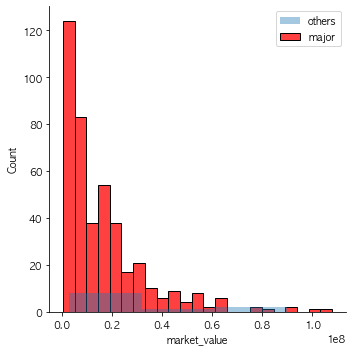

In [111]:
sns.displot(premier_df[premier_df['outfitter'].isin(premier_df['outfitter'].unique()[:3])]['market_value'], kde=False, color='r', label='major')
sns.distplot(premier_df[premier_df['outfitter'].isin(premier_df['outfitter'].unique()[3:])]['market_value'], kde=False, label='others')

plt.legend()
plt.show()

In [112]:
premier_df['outfitter'].unique()[3:]

array(['Under Armour', 'New Balance', 'DIADORA', 'Umbro'], dtype=object)

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(np.array(premier_df['market_value']).reshape(-1, 1))

premier_df['mm_value'] = np.zeros((len(premier_df), 1))
for outfitter in premier_df['outfitter'].unique():
    premier_df['mm_value'][premier_df['outfitter'] == outfitter] = scaler.transform(np.array(premier_df[premier_df['outfitter'].isin([outfitter])]['market_value']).reshape(-1, 1)).flatten()

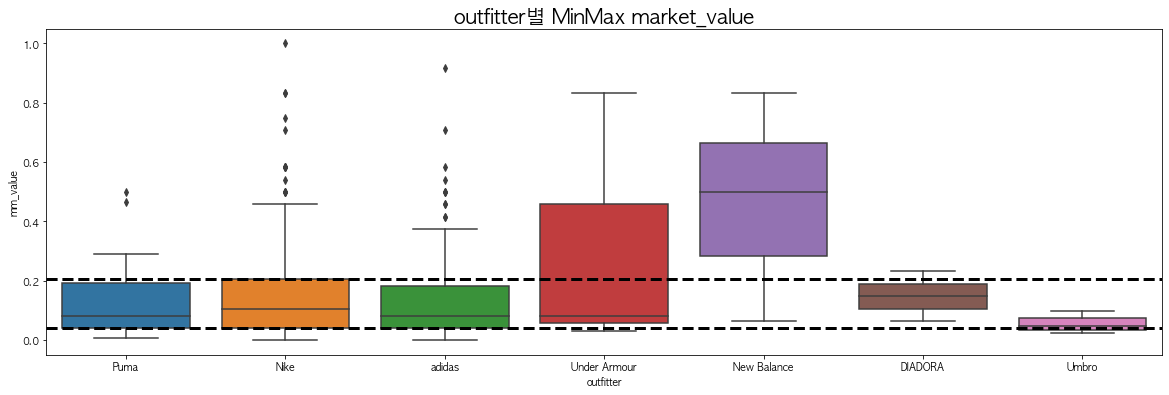

In [137]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=premier_df, x='outfitter', y='mm_value')
plt.axhline(np.percentile(premier_df['mm_value'], 25), color='black', linestyle='--', linewidth=3)
plt.axhline(np.percentile(premier_df['mm_value'], 75), color='black', linestyle='--', linewidth=3)
plt.title('outfitter별 MinMax market_value', fontsize=20)

plt.show()

---

---

### 결측치 파악

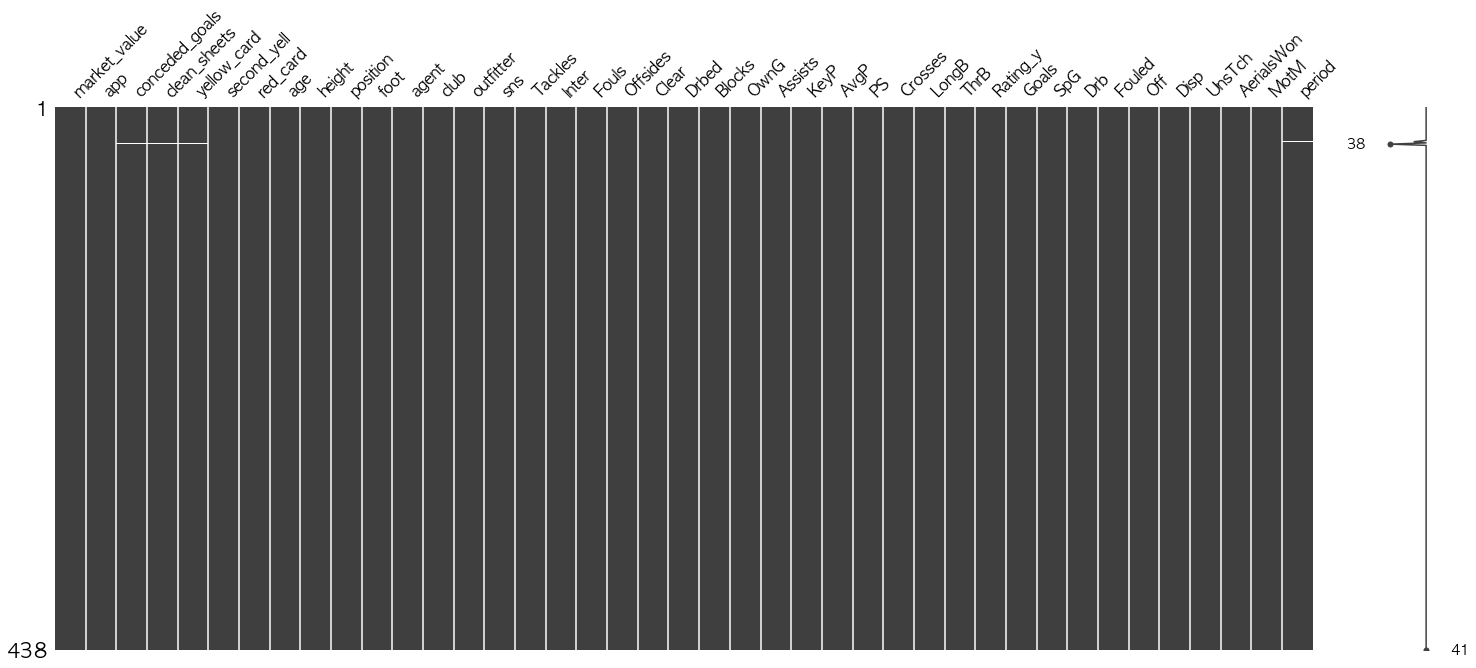

In [12]:
msno.matrix(premier_df);

In [13]:
premier_df[premier_df['conceded_goals'].isna()]

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
30,2700000,0,NaN,NaN,NaN,0,0,25,185,Defender,left,1,Liverpool FC,adidas,1,1.4,0.9,1.0,0.4,2.3,0.9,0.3,0.0,1.0,0.4,32.3,79.2,0.3,1.1,0.0,6.56,0.0,0.2,0.2,0.7,0.1,0.1,0.3,1.3,0.0,5.9


In [14]:
premier_df[premier_df['period'].isna()]

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
28,4500000,3,0.3,0.0,0.3,0,0,20,195,Defender,right,1,Liverpool FC U23,adidas,1,0.3,0.8,0.3,0.5,2.0,0.0,0.0,0.0,0.0,0.3,52.8,88.2,0.0,1.0,0.3,6.46,0.0,0.3,0.0,0.3,0.0,0.0,0.0,3.5,0.0,NaN


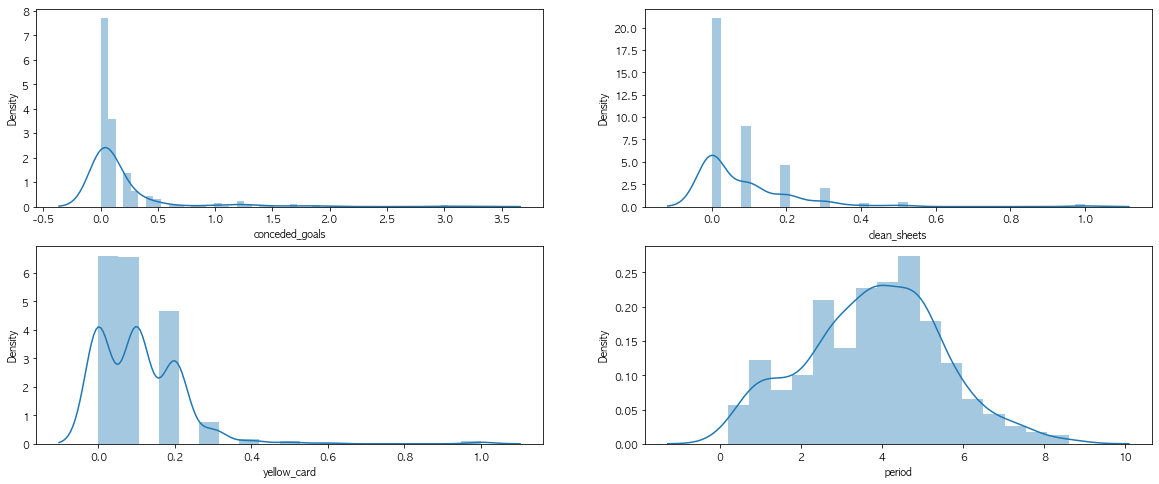

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

sns.distplot(premier_df['conceded_goals'], ax=ax[0, 0])
sns.distplot(premier_df['clean_sheets'], ax=ax[0, 1])
sns.distplot(premier_df['yellow_card'], ax=ax[1, 0])
sns.distplot(premier_df['period'], ax=ax[1, 1])

plt.show()

- conceded_goals, clean_sheets, clean_sheets > 분포가 비대칭으로 중앙값으로 대체
- period > 정규분포와 비슷하므로 평균값으로 대체

In [16]:
premier_df['period'][premier_df['period'].isna()] = premier_df['period'].mean()
premier_df['conceded_goals'][premier_df['conceded_goals'].isna()] = premier_df['period'].median()
premier_df['clean_sheets'][premier_df['clean_sheets'].isna()] = premier_df['period'].median()
premier_df['yellow_card'][premier_df['yellow_card'].isna()] = premier_df['period'].median()

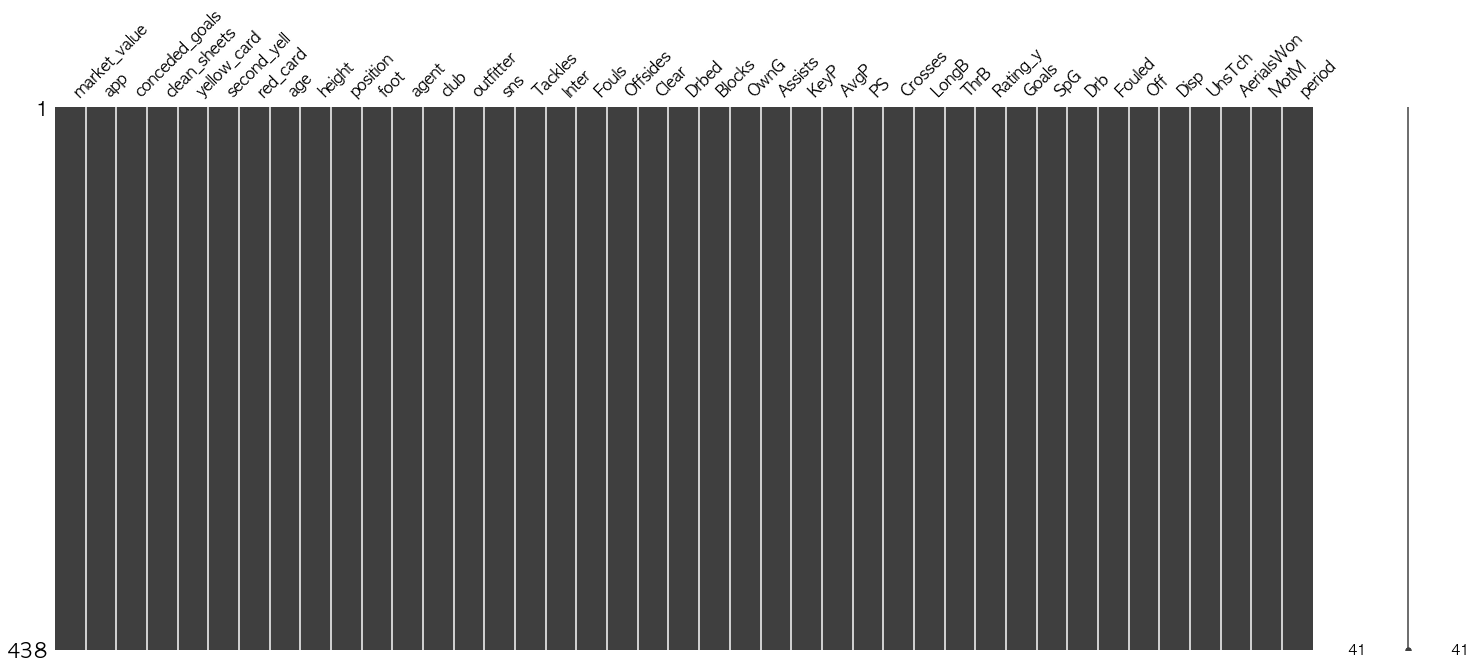

In [17]:
msno.matrix(premier_df);